<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Week3_work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## フィッシャーのアヤメ
有名なデータセットを使い、データ分析の流れとライブラリの使い方を学ぶ

In [39]:
# import専用セル
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

###問題1　irisデータの用意

In [40]:
# データセットの読み込み
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [41]:
# PandasライブラリのDataFlameメソッドを使い、DataFlame型のデータとしてXに格納
# pd.DataFlame(data=格納するデータ, columns=列ラベルの設定, index=行ラベルの設定)
# iris.feature_names : 測定項目をリストで取得
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [42]:
# 目的変数（ラベル）のデータをYに格納
# 0=setosa, 1=versicolor, 2=virginica
Y = pd.DataFrame(data=iris.target, columns=['Species'])
print(Y)

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [43]:
# 扱いやすいように、XとYを結合
df = pd.concat([X, Y], 1)   # [A, B], 1 AとBを横（axis=1）に結合 
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 問題3　データの確認
以下のポイントについて確認する
* 先頭から４番目のデータを参照し、各特徴量は何を指しているかを理解する
*ラベル（0、1、2）ごとのサンプル数の合計を出力する
*特徴量に欠損値がないか確認する　
*特徴量の平均値、標準偏差、四分位数（小さい順にデータを並べて、4等分したときの各区分値）を一度に出力する

In [44]:
# データセットの詳細
print(df.info())

# ４番目まで表示
df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


左から順に、
* sepal length... がく片の長さ（cm）
* sepal width... がく片の幅（cm）
* petal length... 花弁の長さ（cm）
* petal widht... 花弁の幅（cm）
* species... 種類（0=setosa, 1=versicolor, 2=virginica）

<img width="300" alt="flower_petals" src="https://www.codexa.net/wp-content/uploads/2018/03/petal_sepal_label.png">

In [45]:
# 各ラベルの合計数を出力

# DataFlame[coloum名]...任意のcoloumに格納されてるデータを抽出
# value_counts()...対象のデータの各要素の出現回数を抽出
count_each_species = df['Species'].value_counts()
count_each_species

2    50
1    50
0    50
Name: Species, dtype: int64

サンプル数は全て50個

In [46]:
# 欠損値がないか確認
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

欠損値なし

In [47]:
# 各特徴量の、平均値、標準偏差、四分位数を一度に出力
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 問題4　irisデータセット自体の調査
Irisのデータセット(またはフィッシャーのアヤメのデータセット)は、イギリスの統計学者、優生学者、生物学者であるロナルド・フィッシャーが1936年に発表した論文"The use of multiple measurements in taxonomic problems as a example of linear discriminant analysis"で紹介した多変量データセットである。 <br>
エドガー・アンダーソンが3つのアヤメの花の形態学的変異を定量化するためにデータを収集したことから、アンダーソンのアヤメのデータセットと呼ばれることもある。 3種のうち2種はガスペ半島で採取されたものでアンダーソン曰く、「すべて同じ牧草地から採取し、同じ日に採取し、同じ人が同じ装置で同じ時間に測定した」とのこと。<br>

このデータセットは、3種のアイリス（Iris setosa、Iris virginica、Iris versicolor）からそれぞれ50個のサンプルで構成される。各サンプルから4つの特徴を測定。これら4つの特徴の組み合わせに基づいて、フィッシャーは、種を互いに区別するための線形判別モデルを開発した。<br>
    <div>
    <p>Iris setona</p>
    <img width="200" alt="Iris setosa" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg">
    </div>
    <div>
    <p>Iris versicolor</p>
    <img width="200" alt="Iris versicolor" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg">
    </div>
    <div>
    <p>Iris virginca</p>
    <img width="200" alt="Iris virginca" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg">
    </div>


画像は[wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set#cite_note-anderson35-3)から引用



###問題5　必要なデータを抽出
以下のデータを抽出する
* sepal_widthの列を３つの異なる方法で抽出する
* 50番目から99番目までのデータを抽出する
* petal_lengthの列の50番目から99番目までのデータを抽出する
* petal_widthの値が0.2のデータを抽出する

In [48]:
# sepal_widthのデータを3種類の方法で抽出
print("column名からデータ抽出")
print("df['sepal width (cm)']")
print(df['sepal width (cm)'])

print('------------------------------------')

print("locメソッドからデータ抽出")
print("df.loc[:, 'sepal width (cm)']")
print(df.loc[:, 'sepal width (cm)'])

print('------------------------------------')

print("ilocメソッドからデータ抽出")
print("df.iloc[:, 1]")
print(df.iloc[:, 1])

column名からデータ抽出
df['sepal width (cm)']
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64
------------------------------------
locメソッドからデータ抽出
df.loc[:, 'sepal width (cm)']
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64
------------------------------------
ilocメソッドからデータ抽出
df.iloc[:, 1]
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64


In [49]:
# 50番目から99番目までのデータを抽出
df.iloc[50:100]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [50]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df.iloc[50:100, [2]]   # 第一引数に行数、第二引数にcolumnのインデックス番号(リストで指定するとDataflame型になる)。

,petal length (cm)
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


In [51]:
# petal_widthの値が0.2のデータを抽出する
# df[df[条件式]]　で条件を満たす行を抽出
df[df["petal width (cm)"] == 0.2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


### 問題6　図の作成
以下の作業を行う
* ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
* 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
* 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

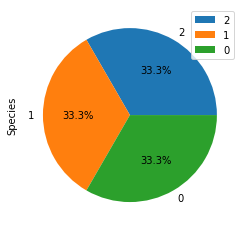

In [52]:
# ラベルごとのサンプル数を描画
species_dataflame = pd.DataFrame(count_each_species)
species_dataflame.plot.pie(subplots=True, autopct='%1.1f%%')
plt.show()

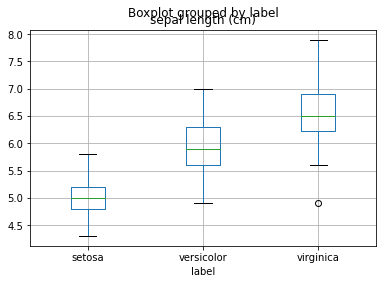

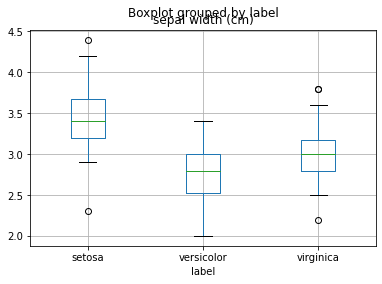

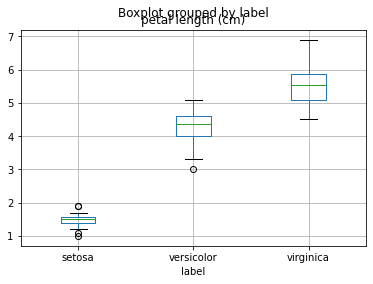

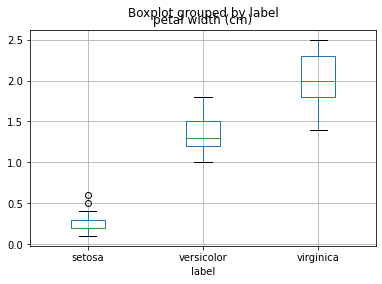

In [53]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
df['label'] = [iris.target_names[i] for i in iris.target]
df.boxplot(column=["sepal length (cm)"], by='label')
df.boxplot(column=["sepal width (cm)"], by='label')
df.boxplot(column=["petal length (cm)"], by='label')
df.boxplot(column=["petal width (cm)"], by='label')
plt.show()

In [54]:
# seabornで描画
sea_iris = seaborn.load_dataset( 'iris' )
sea_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


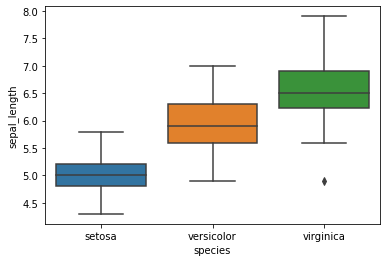

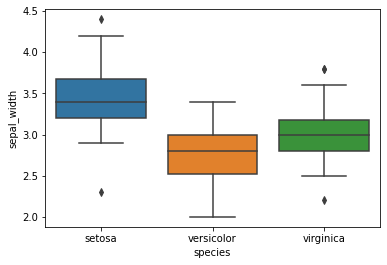

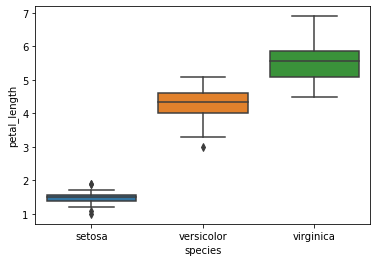

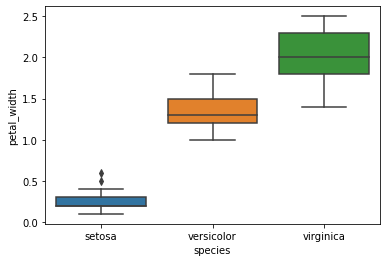

In [55]:
# seaborn.boxplot(x=列, y=xにある任意のデータ, data=対象データ)
for column in sea_iris.columns[:-1]:    # 特徴量を繰り返し取り出す
    seaborn.boxplot(x="species", y=column, data=sea_iris)
    plt.show()

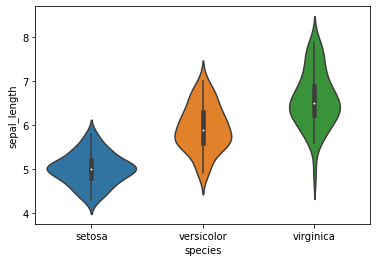

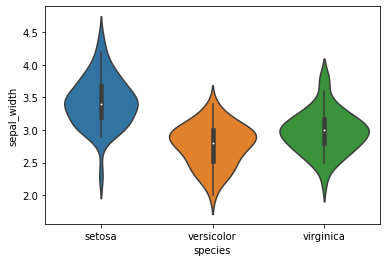

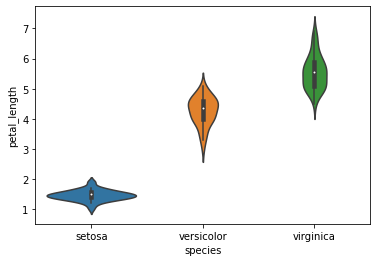

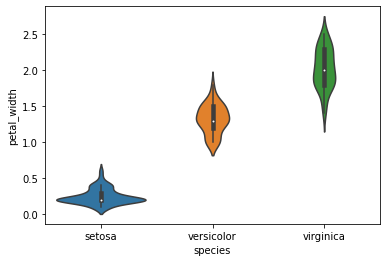

In [56]:
# seaborn.(x=列, y=xにある任意のデータ, data=対象データ)
for column in sea_iris.columns[:-1]:    # 特徴量を繰り返し取り出す
    seaborn.violinplot(x="species", y=column, data=sea_iris)
    plt.show()

* 箱ひげ図はデータを小さい順から5頭分にきれいに分割されているが、最小値から最初の分位点と最後の分位点から最大値までの部分のデータがないように見えてしまう。
* ヴァイオリン図は、グラフが滑らか。データの分布も直感的に分かる。が、分位点がわかりにくい。

### 問題7　特徴量間の関係の確認
以下の作業を行い、特徴量間の関係を確認する。
* 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
* 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
* ４つの特徴量に関する相関係数行列を作る
* 相関係数行列のヒートマップを作る(１つ)

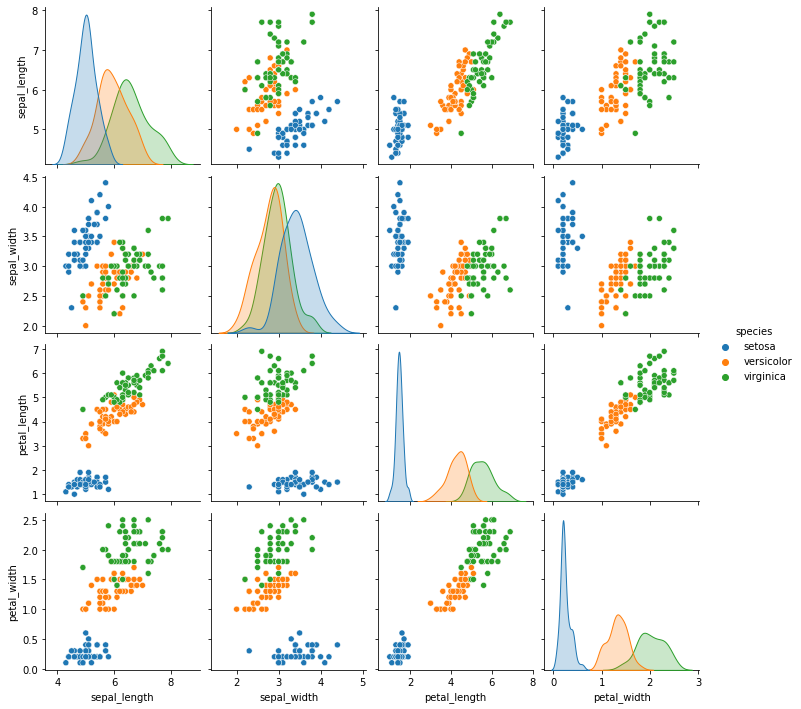

In [57]:
# 全ての特徴量の組み合わせの散布図を一度に表示（散布図行列）
# seaborn.pairplot(対象データ)...対象データの散布図行列が返る
# 引数hueにcolumn名を指定するとそのカテゴリごとに自動で色分けしてくれる
seaborn.pairplot(sea_iris, hue='species')

In [58]:
# 各特徴量どうしの相関を行列（相関係数行列）で表示
iris_corr = sea_iris.corr()
iris_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


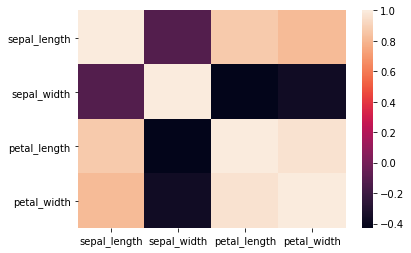

In [59]:
# 相関係数行列をヒートマップで可視化
seaborn.heatmap(iris_corr)

### 問題8　可視化したグラフや表の結果の説明
散布図行列を見る限り、setosaは他二つのアヤメと分布が重複していないため判別するのは簡単なのかもしれない。versicolorとvirgincaを比較してみると、分布が重複してる箇所もあるが、versicolorの方が全体的に数値が低いように見える。ざっくりした印象だと、がく弁、花弁の大きさの関係は、setosa < versicolor <= vieginca となるのかもしれない。 

各特徴量の相関関係を見ると、sepal_lengthとpetal_widthは強い正の相関があると見える（次点でsepal_lengthとpetal_length）。がく片が長いと花弁も大きくなるということになる。しかし、sepal_lengthとpetal_width（及びpetal_length）は負の相関なので、がく片の幅が広いと花弁が小さくなるという事が窺える。
また、sepal_lengthとsepal_widthの相関関係はあまりない（相関係数が0に近い）ため、がく片の幅と長さは関係ないように見える。

###感想
グラフで可視化するまですごく大変だったが、可視化できたときは複雑なデータがこんなにもわかりやすく描画されるなんて、と感動した。

箱ひげ図のメリットは区分位点がわかりやすい事だと思うが、どういった状況で活躍するのかよくわからなかった。